<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/03_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


1. Load in your dataset through its CSV link.

In [1]:
import pandas as pd
df = pd.read_csv('https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv')

2. Find out some information about the data...

In [2]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1592,3678-MNGZX,Male,0,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.7,No
4295,0840-DFEZH,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,564.65,No
2921,4523-WXCEF,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.10,6039.9,Yes
4753,9752-ZNQUT,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,48.60,48.6,No
3680,3990-QYKBE,Male,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.50,3473.4,Yes
6097,5307-UVGNB,Female,0,Yes,Yes,53,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),48.70,2495.2,No
4987,5699-BNCAS,Male,1,No,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.65,1766.75,No
3557,9728-FTTVZ,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.2,Yes
1257,0723-VSOBE,Female,1,No,No,45,No,No phone service,DSL,No,No,No,No,No,Yes,One year,No,Electronic check,34.20,1596.6,No
1568,4628-CTTLA,Male,0,No,No,57,No,No phone service,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,39.30,2111.45,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236
std,0.368226,24.529521,29.992970
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [5]:
df = df.reindex(columns=['gender', 'tenure','MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen',
                         'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',	'OnlineBackup',
                         'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies',	'Contract',	
                         'PaperlessBilling',	'PaymentMethod'])
df

,gender,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,18,39.05,669.85,Yes,0,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1,Male,66,19.95,1269.1,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Female,39,99.95,3767.4,No,0,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
3,Male,10,95.25,1021.55,No,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
4,Female,27,56.70,1652.95,No,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Male,36,95.00,3440.25,No,0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
6334,Female,2,80.45,137.1,No,0,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
6335,Male,72,118.20,8547.15,No,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check
6336,Male,68,84.65,5683.6,No,1,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check


In [6]:
df_cat = pd.get_dummies(df.iloc[:,6:18])
df_cat

,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


Convert values in `gender` column from `Female` and `Male` to `0` and `1`

In [7]:
df['gender']= df['gender'].map({'Male':1, 'Female':0})
df.gender

0       0
1       1
2       0
3       1
4       0
       ..
6333    1
6334    0
6335    1
6336    1
6337    1
Name: gender, Length: 6338, dtype: int64

Convert values in `Churn` column from `yes` and `no` to `0` and `1`

In [8]:
df['Churn']= df['Churn'].map({'Yes':1, 'No':0})
df.Churn

0       1
1       0
2       0
3       0
4       0
       ..
6333    0
6334    0
6335    0
6336    0
6337    0
Name: Churn, Length: 6338, dtype: int64

In [9]:
df_new = pd.concat(
    [df,
     pd.DataFrame(df_cat)],
      axis=1)
df_new

,gender,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,18,39.05,669.85,1,0,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,1,66,19.95,1269.1,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,39,99.95,3767.4,0,0,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,1,10,95.25,1021.55,0,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,27,56.70,1652.95,0,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,1,36,95.00,3440.25,0,0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,0,2,80.45,137.1,0,0,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,1,72,118.20,8547.15,0,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,1,68,84.65,5683.6,0,1,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6338 non-null   int64  
 1   tenure            6338 non-null   int64  
 2   MonthlyCharges    6338 non-null   float64
 3   TotalCharges      6338 non-null   object 
 4   Churn             6338 non-null   int64  
 5   SeniorCitizen     6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [11]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,tenure,MonthlyCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.006877,-0.013217,-0.009607,-0.001738,0.006111,-0.006111,0.005077,0.006111,-0.008817,0.007836,-0.011664,0.005042,0.011084,0.005042,-0.016773,0.009284,0.005042,-0.014045,-0.003054,0.005042,-0.001151,0.002013,0.005042,-0.006740,0.001500,0.005042,-0.005742,0.001535,0.005042,-0.005772,-0.003793,0.011063,-0.006077,0.009738,-0.009738,-0.011546,0.000698,-0.001665,0.012634
tenure,0.006877,1.000000,0.253420,-0.352852,0.020302,-0.000201,0.000201,-0.325528,-0.000201,0.329517,0.018736,0.020267,-0.046360,-0.259710,-0.046360,0.328203,-0.317831,-0.046360,0.372058,-0.315825,-0.046360,0.368972,-0.263473,-0.046360,0.330798,-0.245130,-0.046360,0.285262,-0.249490,-0.046360,0.289185,-0.646061,0.199233,0.562908,-0.008270,0.008270,0.238766,0.236431,-0.207422,-0.234843
MonthlyCharges,-0.013217,0.253420,1.000000,0.186630,0.216512,-0.250153,0.250153,-0.334976,-0.250153,0.489570,-0.165248,0.785887,-0.761278,0.354925,-0.761278,0.295818,0.205784,-0.761278,0.440572,0.168269,-0.761278,0.478925,0.315523,-0.761278,0.337729,0.012285,-0.761278,0.627073,0.015763,-0.761278,0.623040,0.055776,0.001558,-0.066386,-0.352807,0.352807,0.046001,0.026564,0.268326,-0.376189
Churn,-0.009607,-0.352852,0.186630,1.000000,0.148331,-0.013676,0.013676,-0.028939,-0.013676,0.037517,-0.131356,0.306481,-0.219121,0.335327,-0.219121,-0.171946,0.271082,-0.219121,-0.094573,0.249026,-0.219121,-0.071192,0.331588,-0.219121,-0.167020,0.124240,-0.219121,0.059201,0.126671,-0.219121,0.056810,0.404909,-0.177450,-0.302931,-0.190625,0.190625,-0.114962,-0.134992,0.295825,-0.088303
SeniorCitizen,-0.001738,0.020302,0.216512,0.148331,1.000000,-0.004944,0.004944,-0.138745,-0.004944,0.143370,-0.105989,0.250127,-0.180240,0.184062,-0.180240,-0.040256,0.081557,-0.180240,0.069996,0.091176,-0.180240,0.059891,0.206096,-0.180240,-0.064235,0.044631,-0.180240,0.106540,0.033230,-0.180240,0.117919,0.137449,-0.046728,-0.115642,-0.157515,0.157515,-0.015704,-0.020626,0.169522,-0.156361
PhoneService_No,0.006111,-0.000201,-0.250153,-0.013676,-0.004944,1.000000,-1.000000,-0.317128,1.000000,-0.281192,0.453111,-0.292824,-0.171380,0.058244,-0.171380,0.090474,0.092177,-0.171380,0.051268,0.069640,-0.171380,0.074720,0.050650,-0.171380,0.098397,0.116190,-0.171380,0.027192,0.109966,-0.171380,0.033505,-0.006645,0.008449,-0.000278,0.017608,-0.017608,-0.003596,0.007698,-0.008584,0.005691
PhoneService_Yes,-0.006111,0.000201,0.250153,0.013676,0.004944,-1.000000,1.000000,0.317128,-1.000000,0.281192,-0.453111,0.292824,0.171380,-0.058244,0.171380,-0.090474,-0.092177,0.171380,-0.051268,-0.069640,0.171380,-0.074720,-0.050650,0.171380,-0.098397,-0.116190,0.171380,-0.027192,-0.109966,0.171380,-0.033505,0.006645,-0.008449,0.000278,-0.017608,0.017608,0.003596,-0.007698,0.008584,-0.005691
MultipleLines_No,0.005077,-0.325528,-0.334976,-0.028939,-0.138745,-0.317128,0.317128,1.000000,-0.317128,-0.820943,-0.067239,-0.189643,0.308191,-0.119856,0.308191,-0.146031,-0.034350,0.308191,-0.229519,-0.026018,0.308191,-0.237761,-0.111060,0.308191,-0.155023,0.006565,0.308191,-0.265455,0.010294,0.308191,-0.268956,0.091412,0.002537,-0.108784,0.147908,-0.147908,-0.067475,-0.067734,-0.071780

In [12]:
import seaborn as sns
#df1 =  df_new.sample(10)
#sns.pairplot(df1, hue='Churn')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


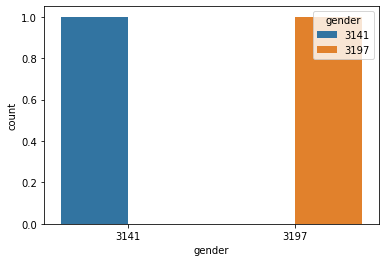

In [13]:
genders = df.gender.value_counts()
sns.countplot(genders, hue=genders);

In [14]:
import matplotlib.pyplot as plt

churns = df.Churn.value_counts()

4. Split your data into training and testing datasets...

In [15]:
from sklearn.model_selection import train_test_split

X = df_new['Contract_Month-to-month']
y = df_new.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [19]:
preds = lr.predict(pd.DataFrame(X_test))

In [20]:
# what do they look like? (show me some of the predictions)
preds

array([0, 0, 0, ..., 0, 0, 0])

7. Score your model...
- accuracy_score
- confusion_matrix

In [21]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 73.13%


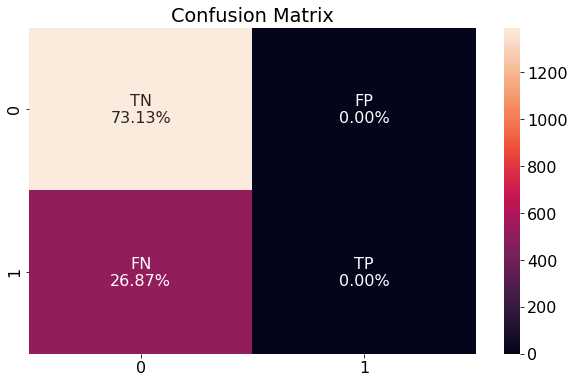

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
cf = confusion_matrix(y_test, lr.predict(pd.DataFrame(X_test)))

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [23]:
from sklearn.model_selection import train_test_split

vars = ['Contract_Month-to-month', 'OnlineSecurity_No', 'tenure', 'Contract_Two year']  

X = df_new[vars]
y = df_new.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

In [24]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [25]:
preds= lr.predict(X_test)

In [26]:
# what do they look like? (show me some of the predictions)
preds

array([1, 0, 0, ..., 0, 0, 0])

10. Score your model...
- accuracy_score
- confusion_matrix

In [27]:
acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 79.81%


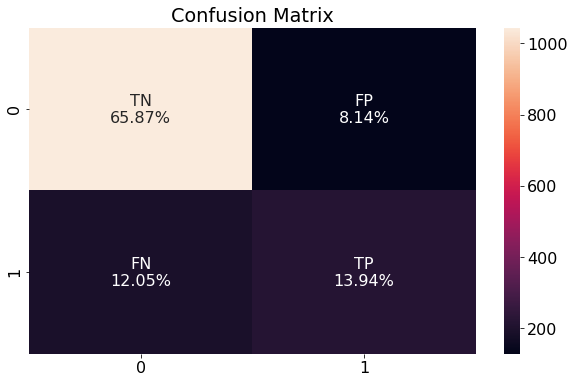

In [28]:
cf = confusion_matrix(y_test, lr.predict(pd.DataFrame(X_test)))

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

11. Which model is better? Why?

The second one is better, when we take more than one feature because the accuracy is heigher.

12. Perform GridSearchCV with the better data

In [29]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False], 'max_iter': [100, 250, 1000, 10000]
}

grid = GridSearchCV(lr, p_grid)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [32]:
from sklearn.metrics import  confusion_matrix

lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train, y_train)
# prediction
pred_lr = lr.predict(X_test)

In [33]:
pred_lr

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
grid.best_score_

0.772775693176158

14. Score the new model... 
- r2_score
- some other metric of your choice

In [35]:
from sklearn.metrics import*

In [36]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

-0.04950380320976011

In [37]:
mean_absolute_error(y_true=y_test, y_pred=preds)

0.20189274447949526

In [38]:
acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 79.81%


Did the score change at all? Why?

Yes, the r2_score is `-0.04950380320976011` and accuracy `79.81%` r2_score is decarese in GridSearchCV and the accuracy is increase. In Logistics Regression the accuracy is `72.61%`

**Group members:**\
Sarah Alhugail\
Farah Sidina\
Eatidal Almutairi\
Bedoor Alharbi

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

In [39]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

In [40]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
sgdc.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
preds = sgdc.predict(X_test)
preds

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
acc = accuracy_score(y_test, preds)
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 79.62%
